In [1]:
#% ALine Jaimes
# 092619

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [2]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = db.create_engine("sqlite:///Resources/hawaii.sqlite")
#connection= engine.connect()
inspector= inspect(engine)
session=Session(engine)

In [3]:
inspector.get_table_names()

['measurement', 'station']

In [4]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Print the column names
print(Measurement())
print(Station())


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [12]:
for record in session.query(Measurement.prcp).all():
    print(record)

(0.08,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.04,)
(0.12,)
(0.0,)
(None,)
(0.03,)
(0.01,)
(None,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.12,)
(0.08,)
(0.03,)
(0.0,)
(0.43,)
(0.06,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.17,)
(0.15,)
(0.27,)
(0.01,)
(0.0,)
(0.01,)
(0.0,)
(0.01,)
(0.01,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.01,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.2,)
(0.08,)
(0.01,)
(0.0,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.05,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0

(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.01,)
(0.05,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.01,)
(0.02,)
(0.02,)
(0.0,)
(0.01,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.03,)
(0.01,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.02,)
(0.02,)
(0.01,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.46,)
(0.03,)
(0.0,)
(1.25,)
(0.03,)
(0.0,)
(0.04,)
(0.02,)
(0.0,)
(0.13,)
(4.2,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.06,)
(0.08,)
(0.05,)
(0.0,)
(0.04,)
(0.01,)
(0.0,)
(0.39,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.0,)
(0.12,)
(0.4,)
(0.0,)
(0.08,)
(0.08,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.13,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(None,)
(None,)
(0.05,)
(0.0,)
(0.03,)
(0.0,)
(0.05,)
(0.0,)
(0.02,)
(1.32,)
(0.42,)
(0.06,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.06,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0

(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.11,)
(0.0,)
(0.0,)
(0.7,)
(0.02,)
(0.0,)
(0.07,)
(0.0,)
(0.09,)
(0.0,)
(0.12,)
(0.01,)
(0.27,)
(0.16,)
(0.04,)
(0.76,)
(3.03,)
(0.27,)
(0.26,)
(0.12,)
(0.0,)
(0.76,)
(0.01,)
(0.0,)
(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.1,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.13,)
(0.73,)
(0.0,)
(0.93,)
(0.8,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.13,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(1.31,)
(0.01,)
(0.01,)
(1.0,)
(0.41,)
(0.01,)
(0.02,)
(0.02,)
(0.01,)
(0.02,)
(0.02,)
(0.0,)
(0.02,)
(0.03,)
(0.0,)
(0.09,)
(0.0,)
(0.0,)
(1.59,)
(0.01,)
(0.02,)
(0.19,)
(0.01,)
(0.0,)
(0.12,)
(0.0,)
(0.14,)
(0.0,)
(0.0,)
(0.89,)
(0.19,)
(0.04,)
(0.0,)
(0.03,)
(0.0,)
(0.02,)
(0.0,)
(0.65,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.31,)
(0.43,)
(0.51,)
(0.2,)
(0.0,)
(0.12,)
(0.27,)
(0.0,)
(0.88,)
(0.39,)
(0.05,)
(0.06,)
(1.1,)
(0.36,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.33,)
(0.04,)
(0.29,)
(0.16,)
(0.81,)
(0.01,)
(0.12,)
(0.13,)
(0.0,)
(0.0,)
(0.01,)
(0.08,)
(0.09,)
(0.04,)


(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.06,)
(0.03,)
(0.0,)
(0.0,)
(0.03,)
(0.04,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.05,)
(0.12,)
(None,)
(0.18,)
(0.06,)
(0.03,)
(0.02,)
(0.32,)
(0.16,)
(0.08,)
(0.0,)
(0.15,)
(0.09,)
(0.14,)
(0.01,)
(0.06,)
(0.0,)
(0.0,)
(0.03,)
(0.13,)
(0.02,)
(None,)
(0.14,)
(0.17,)
(0.0,)
(0.11,)
(0.07,)
(0.0,)
(0.43,)
(0.03,)
(0.0,)
(0.06,)
(0.01,)
(0.25,)
(0.11,)
(0.04,)
(0.05,)
(0.29,)
(0.0,)
(0.09,)
(0.07,)
(0.04,)
(0.0,)
(0.01,)
(0.01,)
(0.01,)
(0.0,)
(0.0,)
(0.14,)
(0.0,)
(0.05,)
(0.13,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.08,)
(0.15,)
(0.01,)
(0.1,)
(0.0,)
(0.0,)
(0.01,)
(0.06,)
(0.11,)
(0.0,)
(0.11,)
(0.03,)
(0.1,)
(0.05,)
(0.04,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.01,)
(0.02,)
(0.03,)
(0.0,)
(0.06,)
(0.03,)
(0.01,)
(0.41,)
(0.57,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.03,)
(0.3,)
(0.09,)
(0.01,)
(0.11,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.04,)
(0.03,)
(0.01,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.01,)
(0.0,)
(0.82,)
(0.0,)
(0.0,)
(0.0,)
(0

(0.0,)
(0.0,)
(0.03,)
(None,)
(0.0,)
(0.0,)
(0.16,)
(0.04,)
(0.02,)
(0.06,)
(0.0,)
(0.04,)
(0.02,)
(0.01,)
(0.2,)
(0.11,)
(0.09,)
(0.0,)
(0.11,)
(1.1,)
(0.0,)
(None,)
(None,)
(None,)
(0.15,)
(0.06,)
(0.11,)
(0.04,)
(0.21,)
(1.24,)
(0.01,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.2,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(None,)
(0.0,)
(0.0,)
(0.09,)
(0.33,)
(None,)
(0.2,)
(0.2,)
(0.0,)
(0.0,)
(0.0,)
(0.62,)
(3.7,)
(0.13,)
(0.11,)
(0.05,)
(0.0,)
(0.0,)
(None,)
(0.22,)
(0.0,)
(0.19,)
(0.24,)
(0.0,)
(None,)
(0.4,)
(None,)
(None,)
(0.75,)
(0.04,)
(0.0,)
(0.23,)
(None,)
(0.07,)
(0.07,)
(0.11,)
(0.08,)
(0.39,)
(0.41,)
(0.3,)
(0.03,)
(0.06,)
(0.05,)
(0.0,)
(0.0,)
(0.08,)
(None,)
(0.04,)
(0.0,)
(2.15,)
(0.0,)
(0.38,)
(3.85,)
(1.8,)
(0.41,)
(0.31,)
(0.0,)
(None,)
(0.0,)
(0.32,)
(0.0,)
(0.07,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.09,)
(0.01,)
(1.05,)
(0.0,)
(0.09,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.11,)
(0.05,)
(None,)
(0.2,)
(0.04,)
(0.0,)
(0.02,)
(0.17,)
(0.2,)
(0.02,)
(0.01,)
(0.0,)
(0.31,)
(0.01,)
(1.

(0.0,)
(0.03,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(1.65,)
(0.78,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(None,)
(0.13,)
(0.02,)
(0.03,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.06,)
(None,)
(None,)
(0.09,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.0,)
(None,)
(0.72,)
(0.03,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.01,)
(0.26,)
(0.0,)
(0.0,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(None,)
(0.0,)
(None,)
(0.2,)
(0.0,)
(0.01,)
(0.14,)
(0.0,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.0,)
(0.02,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(None,)
(0.0,)
(0.12,)
(0.0,)
(0.02,)
(None,)
(None,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.05,)
(0.0,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)


(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.13,)
(0.0,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.01,)
(0.64,)
(0.03,)
(0.0,)
(0.03,)
(0.02,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.15,)
(0.03,)
(2.02,)
(0.3,)
(0.09,)
(0.02,)
(0.04,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(2.86,)
(4.95,)
(0.63,)
(0.58,)
(0.11,)
(0.02,)
(0.02,)
(0.74,)
(0.09,)
(0.07,)
(0.04,)
(0.27,)
(0.01,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.15,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.43,)
(1.34,)
(3.62,)
(0.1,)
(0.0,)
(0.0,)
(0.19,)
(0.0,)
(0.07,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.15,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.95,)
(0.18,)
(0.0,)
(0.04,)
(0.29,)
(1.82,)
(0.71,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.3,)
(0.02,)
(0.01,)
(0.01,)
(1.44,)
(0.0,)
(0.05,)
(0.0,)
(0.02,)
(0.18,)
(0.01,)
(0.06,)
(1.7,)
(0.22,)
(0.27,)
(0.03,)
(0.01,)
(0.9,)
(0.27,)
(0.2,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.07,)
(0.05,)
(0.08,)
(0.23,)
(0.0,)
(0.17,)
(0.0,)
(0.19,)
(0

(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.13,)
(0.25,)
(0.14,)
(0.03,)
(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(None,)
(0.0,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.07,)
(None,)
(0.02,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.11,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.33,)
(0.0,)
(0.0,)
(None,)
(0.05,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.08,)
(0.06,)
(0.07,)
(0.05,)
(None,)
(None,)
(0.0,)
(0.08,)
(0.15,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.17,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.16,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.31,)
(0.37,)
(0.75,)
(2.17,)
(0.69,)
(0.02,)
(0.0,)
(0.37,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.08,)
(0.06,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.57,)
(0.01,)
(0.22,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.12,)
(0.01,)
(0.0,)
(0.0,)
(0.4,)
(0

(0.0,)
(0.0,)
(0.09,)
(0.04,)
(0.71,)
(0.02,)
(0.0,)
(1.76,)
(0.01,)
(0.03,)
(0.06,)
(0.03,)
(0.01,)
(0.19,)
(0.0,)
(0.47,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.48,)
(0.69,)
(0.77,)
(0.49,)
(0.0,)
(0.87,)
(0.26,)
(0.01,)
(0.67,)
(0.41,)
(0.15,)
(0.03,)
(0.64,)
(1.14,)
(0.05,)
(0.0,)
(0.01,)
(0.0,)
(0.1,)
(0.43,)
(0.63,)
(0.31,)
(0.11,)
(0.0,)
(0.01,)
(0.0,)
(0.53,)
(0.06,)
(0.01,)
(0.01,)
(0.01,)
(0.03,)
(0.02,)
(0.35,)
(0.28,)
(0.28,)
(0.0,)
(0.0,)
(0.0,)
(0.19,)
(0.54,)
(1.72,)
(0.32,)
(0.28,)
(0.0,)
(0.0,)
(0.07,)
(0.62,)
(0.14,)
(0.06,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.03,)
(0.0,)
(0.0,)
(0.0,)
(0.75,)
(0.27,)
(3.86,)
(0.26,)
(1.23,)
(0.03,)
(0.03,)
(0.66,)
(0.1,)
(0.0,)
(0.0,)
(0.03,)
(0.3,)
(0.32,)
(0.0,)
(0.02,)
(0.0,)
(0.37,)
(0.11,)
(0.0,)
(0.1,)
(0.02,)
(0.12,)
(0.14,)
(0.01,)
(0.12,)
(0.22,)
(0.24,)
(0.0,)
(0.22,)
(0.2,)
(0.03,)
(0.68,)
(0.42,)
(0.01,)
(0.22,)
(0.06,)
(0.36,)
(0.57,)
(0.03,)
(0.11,)
(0.08,)
(0.0,)
(0.33,)
(0.04,)
(0.09,)
(0.08,)
(1.02,)
(0.11,)
(0.0,)
(0.13,)
(0.43

(0.04,)
(0.01,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.1,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.08,)
(0.35,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.19,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.01,)
(0.01,)
(0.0,)
(0.02,)
(0.01,)
(0.01,)
(0.03,)
(0.0,)
(0.1,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.04,)
(0.02,)
(0.0,)
(0.34,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.06,)
(0.02,)
(0.0,)
(0.13,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(1.8,)
(0.8,)
(0.01,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(4.0,)
(3.05,)
(0.17,)
(0.04,)

(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.4,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.3,)
(0.0,)
(0.15,)
(0.0,)
(0.1,)
(0.0,)
(0.0,)
(0.0,)
(0.14,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.36,)
(0.3,)
(0.0,)
(0.0,)
(0.01,)
(0.14,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.32,)
(0.0,)
(0.0,)
(0.01,)
(0.0,)
(0.03,)
(0.31,)
(0.07,)
(0.1,)
(0.33,)
(1.1,)
(0.01,)
(0.05,)
(0.67,)
(0.0,)
(0.09,)
(0.04,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.65,)
(0.62,)
(0.02,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.42,)
(0.55,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.02,)
(0.2,)
(0.12,)
(0.0,)
(0.12,)
(1.41,)
(1.33,)
(0.9,)
(0.35,)
(0.7,)
(0.24,)
(0.14,)
(0.68,)
(0.03,)
(0.1,)
(0.1,)
(0.83,)
(2.2,)
(1.32,)
(0.11,)
(0.01,)
(0.18,)
(1.0,)
(0.0,)
(0.0,)
(0.07,)
(0.35,)
(0.91,)
(0.0,)
(0.0,)
(0.02,)
(0.49,)
(0.08,)
(0.04,)
(0.19,)
(0.92,)
(2.56,)
(0.87,)
(1.83,)
(1.43,)
(0.35,)
(0.5,)
(0.4,)
(1.04,)
(0.02,)
(0.93,)
(0.0,)
(0.0,)
(0.06,)
(0.03,)
(0.03,)
(0.01,)
(0.68,)
(0.17,)
(None,)
(0.17,)
(0.08,)
(0.0,)
(0.0

(0.09,)
(0.22,)
(0.52,)
(0.15,)
(1.14,)
(0.0,)
(0.03,)
(0.24,)
(0.31,)
(0.03,)
(0.23,)
(None,)
(2.79,)
(0.17,)
(0.0,)
(0.05,)
(0.18,)
(0.04,)
(0.0,)
(0.15,)
(0.24,)
(0.04,)
(0.0,)
(0.0,)
(0.05,)
(0.51,)
(2.2,)
(0.11,)
(0.41,)
(0.19,)
(0.41,)
(0.26,)
(0.68,)
(0.19,)
(0.09,)
(0.03,)
(0.88,)
(0.15,)
(0.29,)
(1.0,)
(0.11,)
(0.57,)
(0.02,)
(0.01,)
(0.0,)
(0.03,)
(0.38,)
(1.45,)
(0.32,)
(0.2,)
(0.75,)
(0.09,)
(0.03,)
(0.74,)
(0.07,)
(0.97,)
(0.42,)
(0.9,)
(1.29,)
(1.29,)
(None,)
(0.42,)
(1.1,)
(0.07,)
(0.12,)
(1.34,)
(0.57,)
(0.42,)
(0.55,)
(0.33,)
(0.16,)
(0.16,)
(1.23,)
(1.01,)
(1.18,)
(None,)
(1.04,)
(0.01,)
(4.3,)
(0.72,)
(0.14,)
(0.93,)
(0.13,)
(0.05,)
(0.26,)
(1.43,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.06,)
(0.95,)
(0.03,)
(None,)
(0.26,)
(0.02,)
(1.1,)
(1.2,)
(0.41,)
(None,)
(0.11,)
(0.07,)
(0.11,)
(0.16,)
(0.29,)
(None,)
(0.16,)
(0.52,)
(0.88,)
(0.09,)
(0.37,)
(0.71,)
(1.14,)
(0.37,)
(None,)
(0.01,)
(0.06,)
(0.03,)
(0.24,)
(0.44,)
(0.93,)
(0.14,)
(None,)
(0.0,)
(0.19,)
(0.01,)
(0.0,)
(0.

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#x=365;
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

qr1=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(qr1)
qr2=dt.date(2017,8,23)-dt.timedelta(days=365)
print(qr2)
ppt=session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date > qr2).\
    order_by(Measurement.date).all()

('2017-08-23',)
2016-08-23


In [16]:
df=pd.DataFrame(ppt)
df.head()
df1=df.groupby(['date']).sum() 
df1.head(12)
df2=df1.reset_index()
df2.head()

,date,prcp
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10


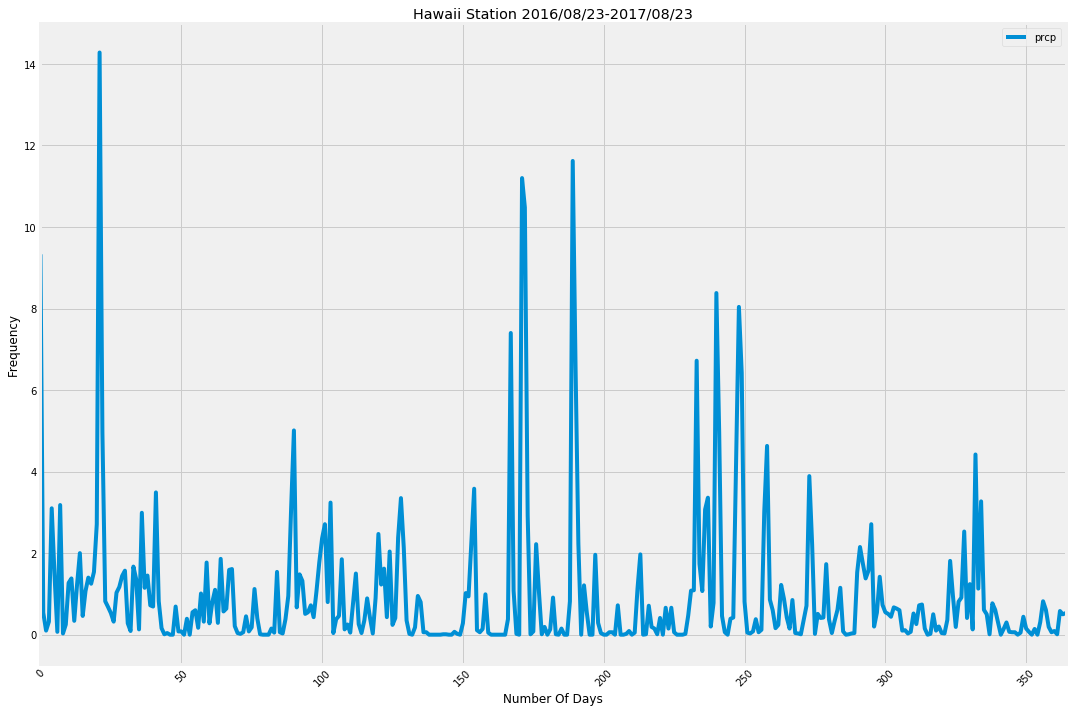

<Figure size 432x288 with 0 Axes>

In [17]:
ax = df2.plot(figsize=(15,10))
ax.set_title("Hawaii Station 2016/08/23-2017/08/23")
ax.set_ylabel('Frequency')
ax.set_xlabel('Number Of Days')
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()
plt.savefig('12-month Precip.png')

# Note that my values are higher because there were four ppt values per day,
# I sum the values and group by day. So there is just one value per day instead
# of 4. 

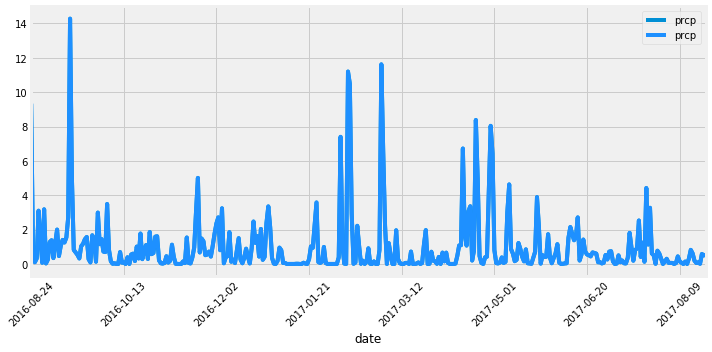

In [18]:
ax = df2.plot(figsize=(10,5))
df2.plot(kind='line',x='date',y='prcp',ax=ax,color='dodgerblue')
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()



![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#df2.describe()  #  last 12 months
df.describe()   #  Overall dataset

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
stns=session.query(Measurement).group_by(Measurement.station).count()
print("Hello, there are {} stations available.".format(stns))
print("Hola, existen {} estaciones disponibles.".format(stns))


Hello, there are 9 stations available.
Hola, existen 9 estaciones disponibles.


In [259]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stnsNo=session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).all()
stnsNo

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [266]:
df3=pd.DataFrame(stnsNo)
#df3.head()
df4=df3.sort_values("count", ascending=False) 
df4.head(9)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [279]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

AT=[func.min(Measurement.tobs),
   func.max(Measurement.tobs),
   func.avg(Measurement.tobs)]
session.query(*AT).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [291]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Hi_AT=session.query(Measurement.tobs).\
        filter(Measurement.station =='USC00519281').\
        filter(Measurement.date >=qr2).\
        order_by(Measurement.date.desc()).all()


In [292]:
# Convert Hi_AT to Pandas Dataframe
df5=pd.DataFrame(Hi_AT)
df5.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


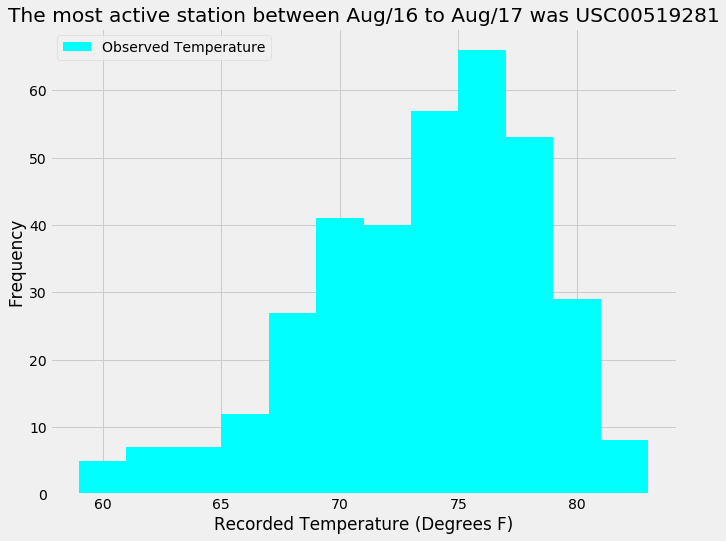

<Figure size 432x288 with 0 Axes>

In [410]:
# plot the results as a histogram
plt.figure(figsize=(10,8))
plt.hist(df5['tobs'], bins=12,color='cyan')
plt.xlabel("Recorded Temperature (Degrees F)")
plt.ylabel("Frequency")
plt.title("The most active station between Aug/16 to Aug/17 was USC00519281")
plt.legend(["Observed Temperature"])
plt.show()
plt.savefig('12-month TOBS.png')

![precipitation](Images/station-histogram.png)

In [300]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [302]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
From=dt.date(2018, 5, 15)
To=dt.date(2018, 5, 30)
PreviousYear=dt.timedelta(days=365)
Temp_LastYear=(calc_temps((From-PreviousYear),(To-PreviousYear)))
print(Temp_LastYear)

[(68.0, 74.94505494505495, 87.0)]


<function matplotlib.pyplot.show(*args, **kw)>

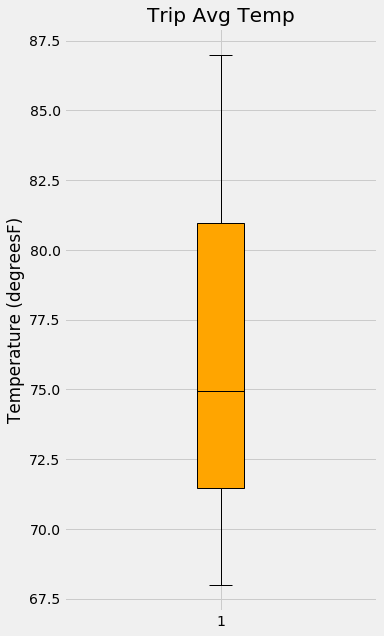

In [341]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

import matplotlib.pyplot as plt

def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       

fig, ax = plt.subplots(figsize=(5,10))
#ax.boxplot(Temp_LastYear)
#ax.boxplot(Temp_LastYear, patch_artist=True)
draw_plot(Temp_LastYear,fill_color='orange', edge_color='black')
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temperature (degreesF)")
plt.show

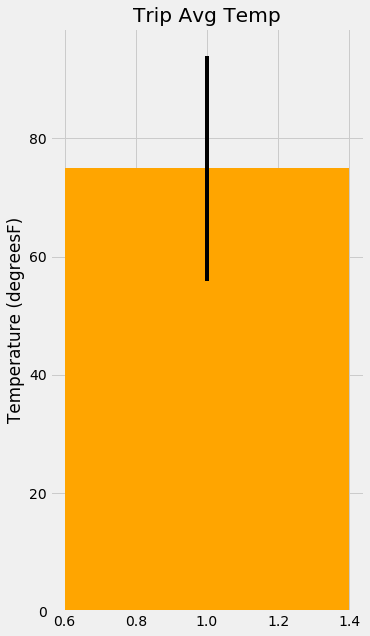

In [411]:
TempBoundary=Temp_LastYear[0][2]-Temp_LastYear[0][0]
MeanTemp=Temp_LastYear[0][1]
MinTemp=Temp_LastYear[0][0]
MinTemp=Temp_LastYear[0][2]

fig, ax = plt.subplots(figsize=(5,10))
#ax.boxplot(Temp_LastYear)
#ax.boxplot(Temp_LastYear, patch_artist=True)
boxplot=ax.bar(1,MeanTemp, color='orange', yerr=TempBoundary)
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temperature (degreesF)")
ax.set_xlabel('')
plt.show
plt.savefig('Trip Avg Temp.png')

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [346]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#1. Join station and measurement tables


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [22]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [36]:
session.query(Measurement.id, Station.id).limit(100).all()

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (11, 8),
 (11, 9),
 (12, 1)]

In [39]:
combined = session.query(Measurement, Station).filter(Measurement.id==Station.id).limit(10).all()
for record in combined:
    (Measurement, Station) = record


InvalidRequestError: SQL expression, column, or mapped entity expected - got '<sqlalchemy.ext.automap.measurement object at 0x00000236490D3588>'

## Optional Challenge Assignment

In [377]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [384]:
# calculate the daily normals for your trip
# for your trip using the previous year's data for those same dates.
Temp_Normals=(daily_normals("05-05"))
print(Temp_Normals)

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
From=dt.date(2018, 5, 15)
To=dt.date(2018, 5, 30)
PreviousYear=dt.timedelta(days=365)
# Use the start and end date to create a range of dates
MyTrip = pd.date_range(From, To)
# Strip off the year and save a list of %m-%d strings
MyTrip_mmdd = MyTrip.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for Trip_Date in MyTrip_mmdd:
    #unpack daily_normals
    normals.append(*daily_normals(Trip_Date))


[(67.0, 73.39655172413794, 79.0)]


In [403]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df6 = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])
df6.head()
df6['Date']=MyTrip
df6=df6.set_index('Date')

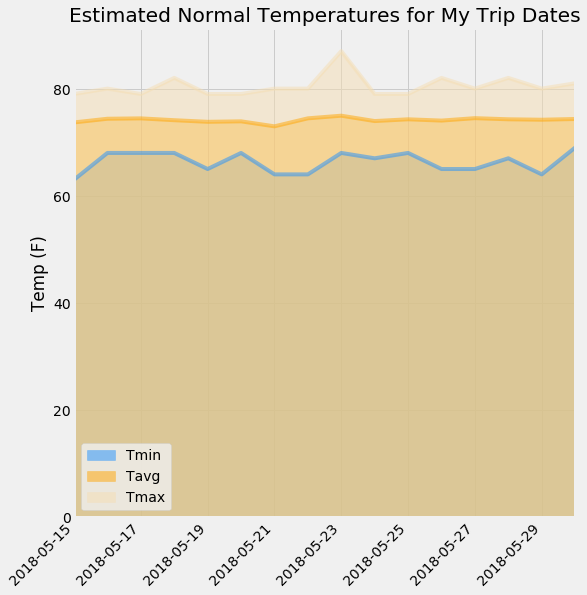

<Figure size 432x288 with 0 Axes>

In [415]:
# Plot the daily normals as an area plot with `stacked=False`
#colors = ['mediumslateblue', 'dodgerblue', 'teal']
colors = ['dodgerblue', 'orange', 'wheat']
df6.plot(kind='area', figsize=(8, 10), stacked=False, x_compat=True, color=colors, title='Estimated Normal Temperatures for My Trip Dates', rot=45)
#make the labels
plt.xlabel('')
plt.ylabel('Temp (F)')

plt.show()
plt.savefig('Normal temperatures.png')

<IPython.core.display.Javascript object>


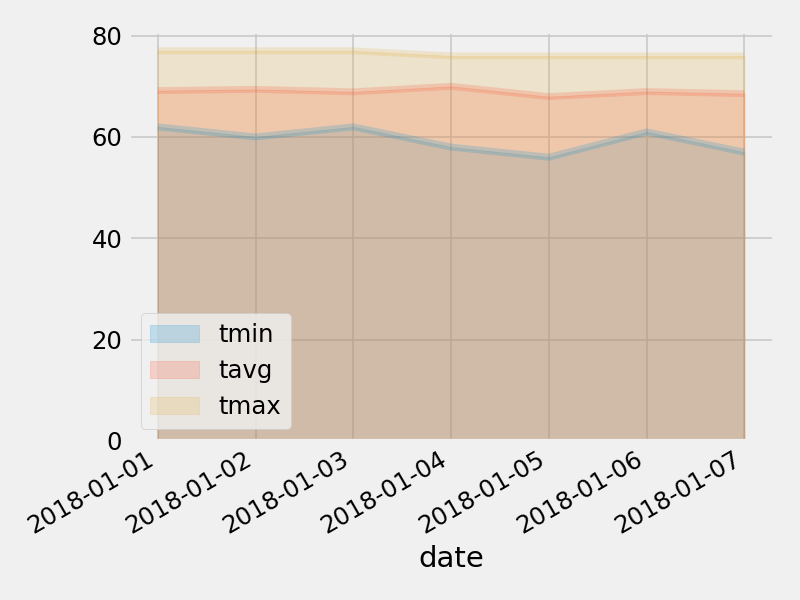